<a href="https://colab.research.google.com/github/heyad/Teaching/blob/master/CV/Lab01U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 01

Upon completion of this lab, you will be able to:

* Understand and prepare your development environment to use OpenCV and python
* Use Google Colab
* Load and display images
* Load and display videos
* Extract frames (sample) from videos and save them to your local desk

### Load and Display Images  

The code below loads displays and check the image dimension. The image is obtained from the https://thispersondoesnotexist.com/. Notice that cv2 is actually the openCV Library, you can find more about it at this link https://opencv.org/

In [1]:
# import necessary modules 
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

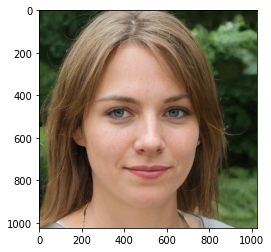

In [ ]:
# open and display the i mage
image = Image.open('/content/sample_data/TestImage.jpeg')
plt.imshow(image)

In [ ]:
# convert the image into an array
image_arr = np.array(image)
# check the array shape
image_arr.shape

(1024, 1024, 3)

Notice that the above code returns the size of the image which is 1024 by 1024 by 3. The number 3 denotes the number of channels in the image (red, green, and blue). We can convert the above image into gray scale image as follows:



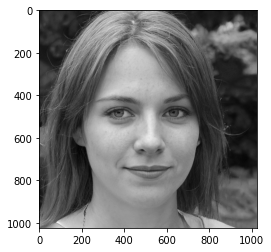

In [ ]:
gray = cv.cvtColor(image_arr,cv.COLOR_BGR2GRAY)
#show the gray image
plt.imshow(gray, cmap='gray')


#### Image Channels (Colors)

You can also display specific channel (color) of the image. 



`



In [ ]:
red_channel = image_arr[:,:,0]
green_channel = image_arr[:,:,1]
blue_channel = image_arr[:,:,2]

Text(0.5, 1.0, 'Blue Channel')

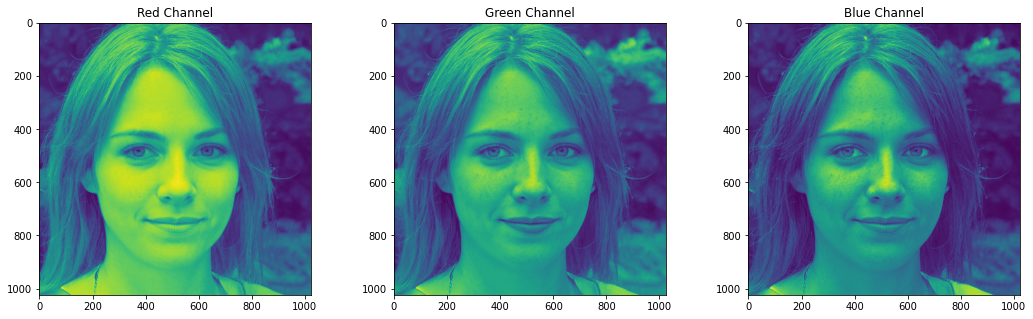

In [ ]:
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(red_channel);plt.title('Red Channel')
plt.subplot(132);plt.imshow(green_channel);plt.title('Green Channel')
plt.subplot(133);plt.imshow(blue_channel);plt.title('Blue Channel')


You should note, that if you work on your local machine you will notice slight differences with Colab e.g. cv2.imshow won't work here. So if you needed to use it, you will need something like below

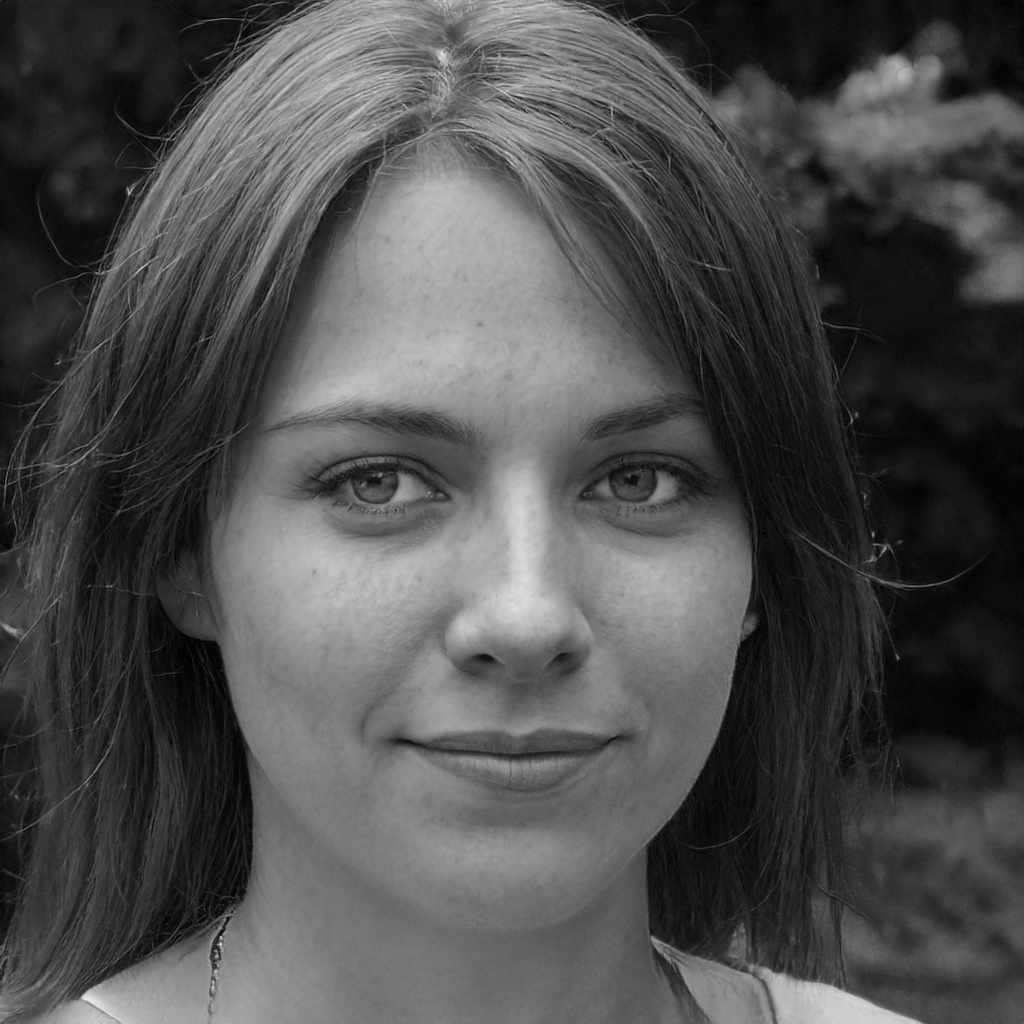

In [ ]:
from google.colab.patches import cv2_imshow
image = cv.imread('/content/sample_data/TestImage.jpeg')
b,g,r = cv.split(image)
cv2_imshow(b)

### Videos

Videos, are essentially a sequence of images. So once you extracted the frames, you can apply same techniques to them similar to what you do with images. 

#### On your local Machine 

* The code below loads a video and displays it in a separate window. The video will continue to play until reaching its end, or pressing q. Recall a video is simply a collection of images.

* **Note**: The path to the video needs to be changed, and also this is if you want to run it locall



```
# capture video 
cap = cv.VideoCapture('../../Data/EMNIST_GAN_HALF.mp4')

# iterate over the video frames till either you press 'q' or end of the video is reached
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True: 
        cv.imshow('frame',frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv.destroyAllWindows()
```





* In openCV, you can also read video files, extract some frames as save them as images on your local desk. Below, the code loads the video, and saves every 50th frame as an image.



```
# Opens the Video file
cap = cv.VideoCapture('../../Data/EMNIST_GAN_HALF.mp4')
# how many frames in the file
length = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
i=0
# sample every 50 frame and save as imaes
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    if i%50==0:
        cv.imwrite('../../Data/mnist'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv.destroyAllWindows()
```



* And you can display these frames as below



```
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('../../Data/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)
```




### Youtube Videos

Working with videos on colab is slighly different. And you may need some Javascript to display and play the videos. Here, we will follow this post [Online](https://medium.com/@meeturadi402/create-a-image-data-set-from-youtube-fa40a5b5bd84) to create a datase from a youtube video.

* Then, you need to install the following modules using the commands below: 

In [ ]:
!pip install pafy
#!pip install imutils pafy youtube-dl
!pip install youtube-dl==2020.12.2

* You might need to install the modules below
* But if you try the code available at [Here](https://medium.com/@meeturadi402/create-a-image-data-set-from-youtube-fa40a5b5bd84) It is likely to show some errors, so you need to edit one of the python library's files 


#### Save Video as a Set of Images

In this part, you will try to process a video, and save it as a sequence of images, you might need to do the following before start this task:

1. Get a video and upload it to your gdrive. You can also use the video available on Moodle Pages
2. Set your working directory
3. If you have the video uploaded to your gdrive, then here is a code to view it on the Google Colab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_path = '/content/sample_data/API-anomalies.mp4'
images_path = '/content/drive/MyDrive/VideoImages'


mp4 = open(video_path, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=400 controls><source src="{data_url}" type="video/mp4">
</video>""")

The function below loads the video from your gdrive or relevant path, take the frames (images) from the video, and save them as images in an output folder. Note that you can decided how many images you want to extract. 

Not that you can write the following commands to create your output folder in your gdrive



```
%cd /content/drive/My\ Drive/
!mkdir VideoImages
%cd VideoImages

```



In [ ]:
def extractImages(pathIn, pathOut,number_of_frames):
    count = 0
    vidcap = cv.VideoCapture(pathIn)
    success,image = vidcap.read()
    success = True
    while success and count<number_of_frames:
        vidcap.set(cv.CAP_PROP_POS_MSEC,(count*1000))    # added this line 
        success,image = vidcap.read()
        print ('Read a new frame and save it: ', count, ' ',success)
        cv.imwrite( pathOut + "\\frame%d.jpg" % count, image)     # save frame as JPEG file
        count = count + 1

In [ ]:
extractImages(video_path, images_path,16)


Read a new frame and save it:  0   True
Read a new frame and save it:  1   True
Read a new frame and save it:  2   True
Read a new frame and save it:  3   True
Read a new frame and save it:  4   True
Read a new frame and save it:  5   True
Read a new frame and save it:  6   True
Read a new frame and save it:  7   True
Read a new frame and save it:  8   True
Read a new frame and save it:  9   True
Read a new frame and save it:  10   True
Read a new frame and save it:  11   True
Read a new frame and save it:  12   True
Read a new frame and save it:  13   True
Read a new frame and save it:  14   True
Read a new frame and save it:  15   True


## Tasks 

1. Write a function that display some of the images that were extracted from the video. 

2. Customise the function above $extractImages$ so that the images are resized to $100\times 100$ before being saved

This [Tutorial](https://colab.research.google.com/drive/13YSigxuNyacOIxxXjiK6fZbZAA2MQZzy?usp=sharing) might provide some information to complete these tasks. 